In [1]:
!pip install seaborn plotly scikit-learn

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -------------- ------------------------- 3.7/9.9 MB 16.8 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.9 MB 11.4 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.9 MB 9.3 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.9 MB 7.9 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.9 MB 7.5 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.9 MB 6.8 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 5.6 MB/s  0:00:01
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.9 MB 1.7 MB/s eta 0:00:05
   --- ---------------------------

In [2]:
import pandas as pd
import numpy as np

# Create a mock banking DataFrame
np.random.seed(42)
n_customers = 200

df = pd.DataFrame({
    "customer_id": np.arange(1, n_customers+1),
    "age": np.random.randint(18, 75, n_customers),
    "gender": np.random.choice(["Male", "Female"], n_customers),
    "account_balance": np.round(np.random.uniform(500, 50000, n_customers), 2),
    "loan_amount": np.where(np.random.rand(n_customers) < 0.4,
                             np.round(np.random.uniform(1000, 200000, n_customers), 2), np.nan),
    "is_active": np.random.choice([True, False], n_customers, p=[0.85, 0.15]),
    "total_deposits": np.round(np.random.uniform(0, 80000, n_customers), 2),
    "transactions_count": np.random.randint(5, 200, n_customers)
})

df["has_loan"] = ~df["loan_amount"].isnull()


In [3]:
df

,customer_id,age,gender,account_balance,loan_amount,is_active,total_deposits,transactions_count,has_loan
0,1,56,Female,32656.83,NaN,True,73239.06,26,False
1,2,69,Female,42536.56,NaN,True,2715.68,31,False
2,3,46,Male,33051.84,NaN,True,55793.62,199,False
3,4,32,Female,28631.28,NaN,True,23787.92,85,False
4,5,60,Female,5136.90,74723.95,True,73951.70,130,True
...,...,...,...,...,...,...,...,...,...
195,196,45,Female,28885.18,184247.53,True,63584.76,163,True
196,197,45,Male,31775.94,NaN,True,55494.58,190,False
197,198,61,Female,22698.05,NaN,False,17661.57,193,False
198,199,61,Female,15013.93,118663.81,True,6590.48,28,True


In [4]:
# Display shape
print("Shape:", df.shape)

# Show basic statistics
print(df.describe(include="all"))

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Unique values for categorical columns
for col in ['gender', 'is_active', 'has_loan']:
    print(f"Unique in {col}:", df[col].unique())

# Value counts example
print("Active accounts:\n", df['is_active'].value_counts())
print("Loans:\n", df['has_loan'].value_counts())

Shape: (200, 9)
        customer_id         age  gender  account_balance    loan_amount  \
count    200.000000  200.000000     200       200.000000      79.000000   
unique          NaN         NaN       2              NaN            NaN   
top             NaN         NaN  Female              NaN            NaN   
freq            NaN         NaN     106              NaN            NaN   
mean     100.500000   45.260000     NaN     25955.194850  100215.933291   
std       57.879185   16.040852     NaN     14541.328704   53862.628226   
min        1.000000   18.000000     NaN      1036.460000    4994.170000   
25%       50.750000   31.750000     NaN     14458.485000   53975.395000   
50%      100.500000   45.000000     NaN     27031.745000  102014.470000   
75%      150.250000   59.000000     NaN     38163.705000  142348.530000   
max      200.000000   74.000000     NaN     49530.000000  198002.090000   

       is_active  total_deposits  transactions_count has_loan  
count        200   

In [6]:
# Handling missing values (fill with median or drop)
df_clean = df.copy()
df_clean["loan_amount"] = df_clean["loan_amount"].fillna(0)

# Convert datatypes if needed
df_clean["is_active"] = df_clean["is_active"].astype(bool)
df_clean["has_loan"] = df_clean["has_loan"].astype(bool)

# Remove duplicates
df_clean.drop_duplicates(subset="customer_id", inplace=True)


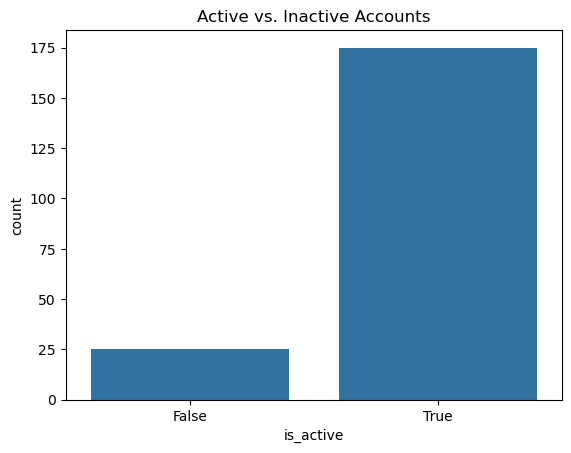

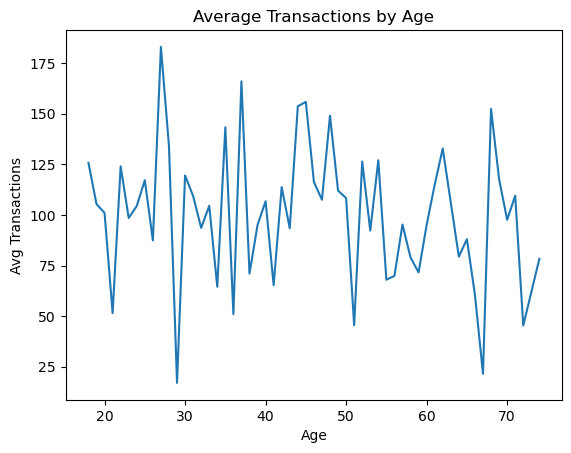

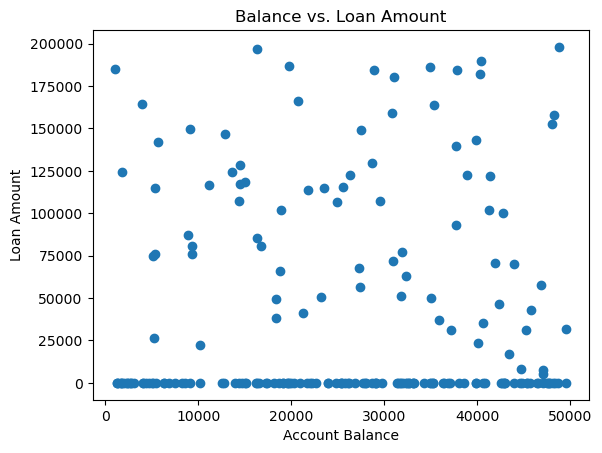

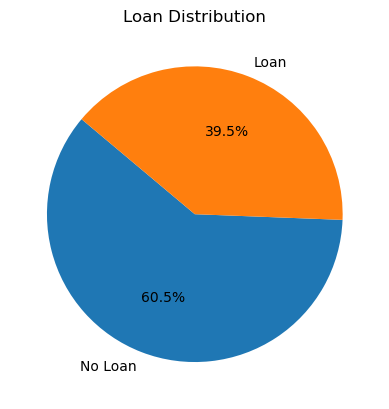

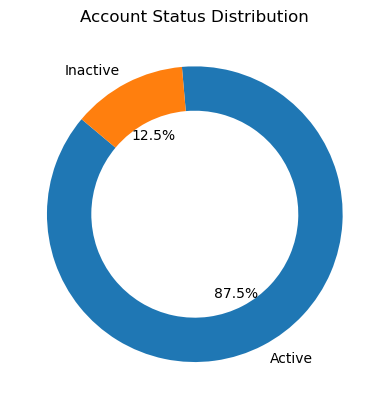

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Bar chart: Active vs Inactive Accounts
plt.figure()
sns.countplot(data=df_clean, x="is_active")
plt.title("Active vs. Inactive Accounts")
plt.savefig("bar_active_accounts.png")

# Line chart: Transaction count by Age
plt.figure()
df_age_trans = df_clean.groupby("age")["transactions_count"].mean()
plt.plot(df_age_trans.index, df_age_trans.values)
plt.xlabel("Age")
plt.ylabel("Avg Transactions")
plt.title("Average Transactions by Age")
plt.savefig("line_transactions_by_age.png")

# Scatter plot: Account Balance vs. Loan Amount
plt.figure()
plt.scatter(df_clean["account_balance"], df_clean["loan_amount"])
plt.xlabel("Account Balance")
plt.ylabel("Loan Amount")
plt.title("Balance vs. Loan Amount")
plt.savefig("scatter_balance_loan.png")

# Pie chart: Loan distribution
plt.figure()
loan_counts = df_clean["has_loan"].value_counts()
plt.pie(loan_counts, labels=["No Loan", "Loan"], autopct="%1.1f%%", startangle=140)
plt.title("Loan Distribution")
plt.savefig("pie_loan_distribution.png")

# Donut chart: Account status
plt.figure()
status_counts = df_clean["is_active"].value_counts()
plt.pie(status_counts, labels=["Active", "Inactive"], autopct="%1.1f%%",
        startangle=140, wedgeprops=dict(width=0.3))
plt.title("Account Status Distribution")
plt.savefig("donut_account_status.png")


In [9]:
with PdfPages("banking_report.pdf") as pdf:
    for fname in [
        "bar_active_accounts.png",
        "line_transactions_by_age.png",
        "scatter_balance_loan.png",
        "pie_loan_distribution.png",
        "donut_account_status.png"
    ]:
        fig = plt.figure()
        img = plt.imread(fname)
        plt.imshow(img)
        plt.axis('off')
        pdf.savefig(fig)
        plt.close()
